# Cellular Automata simulation
hbarquanta

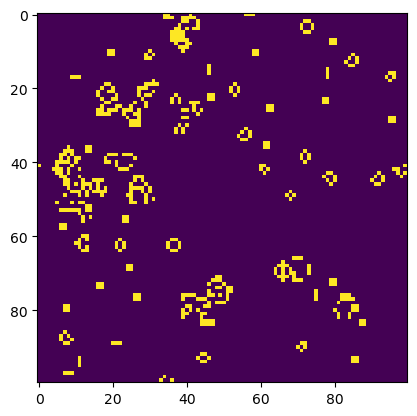

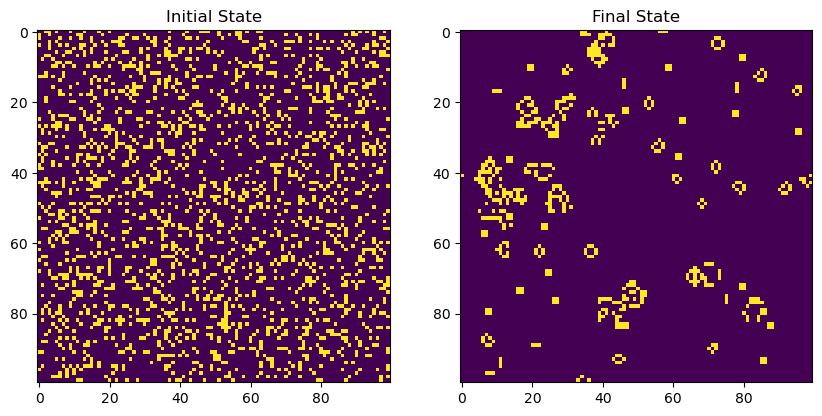

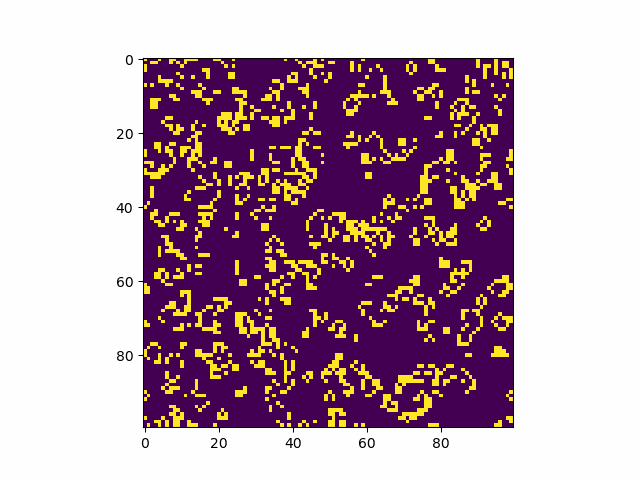

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import Image

ON = 255  # alive
OFF = 0  # dead
vals = [ON, OFF]

def update(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line 
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neighbor sum
            # using toroidal boundary conditions - x and y wrap around 
            # so that the simulation takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

def plot_initial_final_states(grid_initial, grid_final, N):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(grid_initial, interpolation='nearest')
    axs[0].set_title('Initial State')
    
    axs[1].imshow(grid_final, interpolation='nearest')
    axs[1].set_title('Final State')
    
    plt.show()

def create_animation(grid, N, updateInterval, frames):
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')

    def update_animation(frame):
        update(frame, img, grid, N)
        return img,
    
    ani = animation.FuncAnimation(fig, update_animation, frames=frames, interval=updateInterval, blit=True)
    ani.save('automata_simulation.gif', writer=PillowWriter(fps=10))
    plt.close()
    return ani

def main():
    # set grid size
    N = 100
    # set animation update interval
    updateInterval = 50
    # number of frames for the animation
    frames = 200
    
    # initialize grid with random on/off - more off than on
    grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
    
    # save the initial state
    grid_initial = grid.copy()
    
    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    
    # run the simulation
    for _ in range(frames):
        update(_, img, grid, N)
    
    # save the final state
    grid_final = grid.copy()
    
    # plot initial and final states
    plot_initial_final_states(grid_initial, grid_final, N)
    
    # create and save the animation
    anim = create_animation(grid_initial, N, updateInterval, frames)
    
    # Display the animation in Jupyter Notebook
    return anim

# call main and display the animation
if __name__ == '__main__':
    anim = main()
    display(Image('automata_simulation.gif'))
